In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [ ]:
# Data Collection
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
# Pre Processing (Input) - Normalization
x_train = x_train / 255.0

# Pre Processing (Output) - One Hot Encoding
y_train = pd.get_dummies(y_train)

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000, 10))

In [ ]:
# Modelling

# Layers
# -------
# Input L1    - (784)
# Hidden L2   - (128) # HyperParameter
# Output L3   - (10)

In [ ]:
del model

In [ ]:
# Keras - we want to make a DL model
# There are 2 ways to make a model -
# 1. Sequential
# 2. Functional

# Create an empty Sequential Keras model
model = tf.keras.models.Sequential()
# Add our first layer
model.add(tf.keras.layers.Input((28, 28), name="Input"))
# Flattening Layer
model.add(tf.keras.layers.Flatten(name = "Flatten"))
# Hidden Layer
model.add(tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu, name = "Hidden"))
# Output Layer
model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax, name="Output"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Hidden (Dense)              (None, 128)               100480    
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# define loss function, what optimizer to use
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=["acc"]) #Accuracy

In [ ]:
model.fit(x=x_train, y=y_train, epochs=15, batch_size=32, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.6764 - acc: 0.8312 - val_loss: 0.3220 - val_acc: 0.9132
Epoch 2/15
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3509 - acc: 0.9033 - val_loss: 0.2621 - val_acc: 0.9267
Epoch 3/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3007 - acc: 0.9158 - val_loss: 0.2307 - val_acc: 0.9337
Epoch 4/15
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2701 - acc: 0.9247 - val_loss: 0.2133 - val_acc: 0.9402
Epoch 5/15
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2469 - acc: 0.9316 - val_loss: 0.1951 - val_acc: 0.9470
Epoch 6/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2280 - acc: 0.9367 - val_loss: 0.1804 - val_acc: 0.9515
Epoch 7/15
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2117 - acc: 0.9416 - val_loss: 0.1728 - val_acc: 0.9537
Epoch 8/15
1688/1688 [==============================] - 4s 2ms

Text(0.5, 1.0, 'Accuracy of Model')

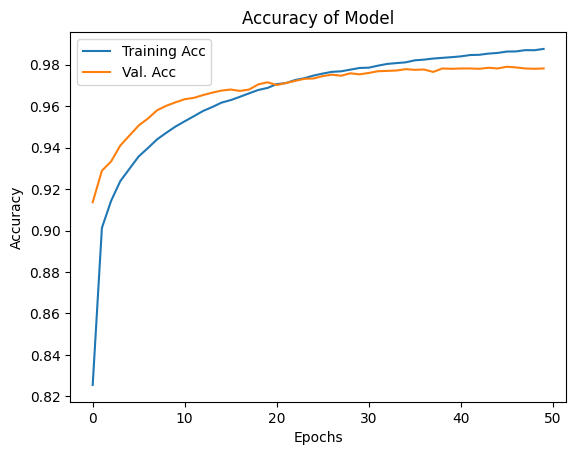

In [ ]:
plt.plot(model.history.history["acc"], label = "Training Acc")
plt.plot(model.history.history["val_acc"], label = "Val. Acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy of Model")

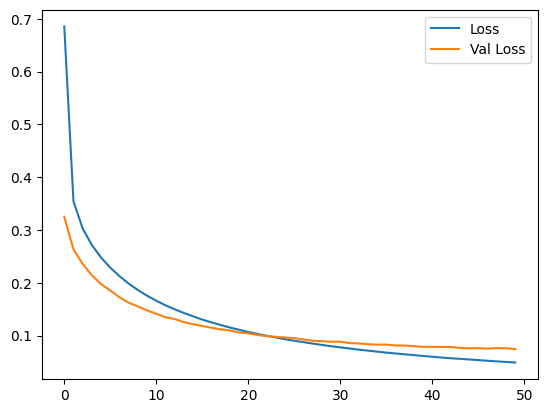

In [ ]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["val_loss"], label="Val Loss")
plt.legend()

In [ ]:
model.get_weights()[0]

array([[-0.00529715, -0.05923248,  0.05015898, ..., -0.06343196,
        -0.00117467,  0.0479716 ],
       [ 0.01847024,  0.05699859,  0.07541379, ..., -0.0325563 ,
         0.06981809, -0.008026  ],
       [-0.05186021,  0.05623665,  0.00695931, ..., -0.007263  ,
        -0.06845408, -0.06908262],
       ...,
       [ 0.02967228, -0.01941295,  0.01339339, ..., -0.05682467,
        -0.03059383,  0.01846197],
       [ 0.02412035,  0.03331976,  0.05397118, ...,  0.0164782 ,
         0.01531916,  0.02377673],
       [ 0.03131395,  0.03056581,  0.05722118, ..., -0.06584171,
         0.04815056, -0.02133767]], dtype=float32)

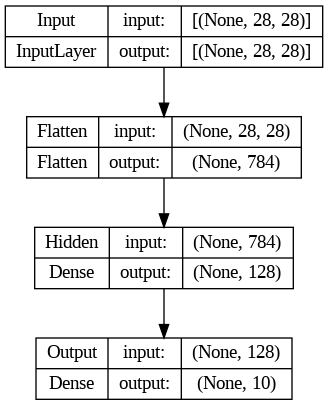

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)